# 一般化モーメント法と操作変数法

母集団モーメントを利用する母回帰係数の表記

単回帰モデル$Y_i = \alpha + \beta X + \gamma Z_i + u_i$のとき、

$$
\beta_{IV} = \frac{Cov(Z_i, Y_i)}{ Cov(Z_i, X_i) }
, \hspace{2em}
\alpha_{IV} =  E(Y_i) - \beta_{IV} E(X_i)
$$

## モーメント条件から導出するOLS



## IV推定量（行列表記）


同時方程式モデル

$$
Y_1 = \beta_1 Y_2 + \gamma_1 Z_1 + \varepsilon_1\\
Y_2 = \beta_2 Y_1 + \gamma_2 Z_2 + \varepsilon_2
$$

があるとする。外生変数が$Z$である。

行列形式で$\boldsymbol{\beta}_1 = (\beta_1, \gamma_1)^T$のようにまとめて

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{Y}_1 = [\b{Y}_2|\b{Z}_1] \b{\beta}_1 + \b{\varepsilon}_1 = \b{X}_1 \b{\beta}_1 + \b{\varepsilon}_1\\
\b{Y}_2 = [\b{Y}_1|\b{Z}_2] \b{\beta}_2 + \b{\varepsilon}_2 = \b{X}_2 \b{\beta}_2 + \b{\varepsilon}_2
$$

と書くことにする。外生変数からなる行列を$\b{Z} = [\b{Z}_1|\b{Z}_2]$と表し、転置行列を左から掛けると

$$
\b{Z}^T \b{Y}_1 = \b{Z}^T \b{X}_1 \b{\beta}_1 + \b{Z}^T \b{\varepsilon}_1
$$

$\b{Z}^T \b{X}_1$の逆行列の存在を仮定して掛けると

$$
(\b{Z}^T \b{X}_1)^{-1} \b{Z}^T \b{Y}_1 =  \b{\beta}_1
+ (\b{Z}^T \b{X}_1)^{-1} \b{Z}^T \b{\varepsilon}_1
$$

標本モーメントを使って表すと

$$
\left( \frac{ \b{ Z^T X}_1 }{n} \right) ^{-1}
\left( \frac{ \b{ Z^T Y}_1 }{n} \right)
=  \b{\beta}_1
+ \left( \frac{ \b{ Z^T X}_1 }{n} \right)^{-1}
  \left( \frac{ \b{Z}^T \b{\varepsilon}_1 }{n} \right)
$$


$\b{Z^T X}_1/n$は定数に、$\b{Z}^T \b{\varepsilon}_1/n$は$\b{Z}$が誤差項$\b{\varepsilon}$と無相関であれば$0$に確率収束する。


$$
\b{b}_1^{(IV)} = (\b{ Z^T X}_1)^{-1} \b{ Z^T Y}_1
$$

を**操作変数推定量（instrumental variable estimator）**という。



$\b{Y}_1 = \b{X}_1 \b{\beta}_1 + \b{\varepsilon}_1$を代入すると

$$
\begin{align}
\b{b}_1^{(IV)}
&= (\b{ Z^T X}_1)^{-1} \b{Z}^T (\b{X}_1 \b{\beta}_1 + \b{\varepsilon}_1)\\
&= (\b{ Z^T X}_1)^{-1} \b{Z}^T \b{X}_1 \b{\beta}_1
  + (\b{ Z^T X}_1)^{-1} \b{Z}^T \b{\varepsilon}_1\\
&= \b{\beta}_1 + (\b{ Z^T X}_1)^{-1} \b{Z}^T \b{\varepsilon}_1\\
\end{align}
\DeclareMathOperator*{\plim}{plim}
$$

となる。確率極限をとると$\plim_{n\to\infty} \b{Z}^T \b{\varepsilon}_1/n = 0$なので

$$
\DeclareMathOperator*{\plim}{plim}
\plim_{n\to\infty} \b{b}_1^{(IV)}
= \b{\beta}_1
$$

:::{admonition} **標本モーメントの確率極限**

$n$を大きくしていったとき、標本平均$\sum_i X_i / n$は母平均$\mu$に一致する。これを確率極限といい、$\text{plim}(\sum_i X_i / n) = \mu$のように表す。

$$
\text{ plim }\left( \frac{\sum_i X_i^2}{n} \right) 
= \text{ plim }\left( \frac{\boldsymbol{x}^T \boldsymbol{x}}{n} \right) 
= \mu^2 - \sigma^2
$$


（$Var[X] = E[X^2] - E[X]^2$なので$\mu^2$が残っている)


2つの変数の2次の標本モーメントは

$$
\text{ plim }\left( \frac{\sum_i X_i Y_i}{n} \right) 
= \text{ plim }\left( \frac{\boldsymbol{x}^T \boldsymbol{y}}{n} \right) 
= \mu_X \mu_Y - \sigma_{XY}
$$

となる。平均がゼロで$X$と無相関の$\varepsilon$との2次の標本モーメントは

$$
\text{ plim }\left( \frac{\sum_i X_i \varepsilon_i}{n} \right) 
= \text{ plim }\left( \frac{\boldsymbol{x}^T \boldsymbol{\varepsilon}}{n} \right) 
= \mu_X \mu_{\varepsilon} - \sigma_{X \varepsilon}
= 0
$$

となる
:::

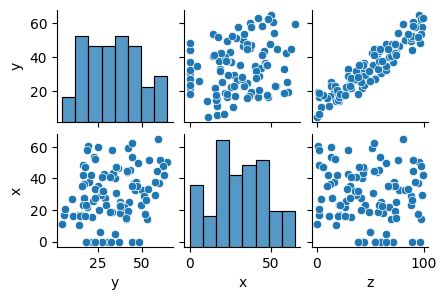

In [222]:
# Generate Data
import numpy as np
np.random.seed(0)
n = 10
b = np.array([0.3, 0.5])

z = np.array([])
x = np.array([])
y = np.array([])
for i in range(10):
    z_ = np.random.uniform(low=0, high=100, size=n)
    if i == 0:
        x_ = np.zeros(shape=(n,))
    else:
        x_ = y_

    y_ = b[0] * x_ + b[1] * z_ + np.random.normal(size=n)
    z = np.concatenate([z, z_])
    x = np.concatenate([x, x_])
    y = np.concatenate([y, y_])

Z = z.reshape(n*10, -1)
X = x.reshape(n*10, -1)

import seaborn as sns
import pandas as pd
df = pd.DataFrame(dict(y=y, x=x, z=z))
sns.pairplot(df, height=1.5, y_vars=["y", "x"])

In [219]:
np.linalg.inv(Z.T @ X) @ (Z.T @ y)

array([1.4245943])

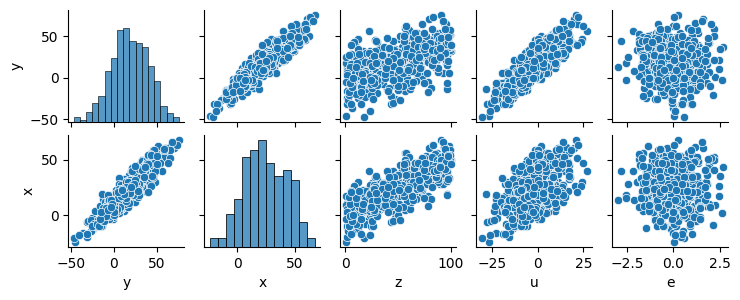

In [299]:
# Generate Data
import numpy as np
n = 500
np.random.seed(0)
b_zx = 0.5
b_xy = 0.8
z = np.random.uniform(low=0, high=100, size=n)
u = np.random.normal(scale=10, size=n) # unobserved variable
x = u + b_zx * z + np.random.normal(scale=5, size=n) # Z -> X
y = u + b_xy * x + np.random.normal(size=n) # X -> Y; U -> {X, Y}

X = x.reshape(n, -1)
Z = z.reshape(n, -1)


import seaborn as sns
import pandas as pd
df = pd.DataFrame(dict(y=y, x=x, z=z, u=u, e=e))
sns.pairplot(df, height=1.5, y_vars=["y", "x"])

In [300]:
# OLS
np.linalg.inv(X.T @ X) @ (X.T @ y)

array([0.87772517])

In [301]:
# IV
z2y = np.linalg.inv(Z.T @ Z) @ (Z.T @ y)
z2x = np.linalg.inv(Z.T @ Z) @ (Z.T @ x)
z2y / z2x

array([0.77019506])

In [302]:
z2x

array([0.49124653])

In [304]:
# IV
np.linalg.inv(Z.T @ X) @ (Z.T @ y)

array([0.77019506])

In [305]:
from linearmodels.iv import IV2SLS
model = IV2SLS.from_formula("y ~ [x ~ z]", df).fit()
model

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                      y   R-squared:                      0.8714
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8711
No. Observations:                 500   F-statistic:                    2402.9
Date:                Sun, Jul 30 2023   P-value (F-stat)                0.0000
Time:                        02:17:35   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
x              0.7702     0.0157     49.020     0.0000      0.7394      0.8010
==============================================================================

Endogenous: x
Instruments: z
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7fe0f2d91f10

## 2SLS推定量とIV推定量の同値性

2SLS推定量とIV推定量は同値である（『新しい計量経済学』p.216）